In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
cv=read.csv("covid.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)
cv$FECHA_DEF = ifelse(cv$FECHA_DEF !="9999-99-99",1,0)

p = cv %>% filter(FECHA_DEF == 0) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(FECHA_DEF == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(FECHA_DEF == 0)
cv_covid_positivo = cv %>% filter(FECHA_DEF == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)#50% ya fallecieron y 50% no


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'verification' was built under R version 3.6.3"
Warning message:
"package 'fields' was built under R version 3.6.3"
Warning message:
"package 'spam' was built under R version 3.6.3"
Warning message:
"package 'dotCall64' was built under R version 3.6.3"
Warning message:
"package 'maps' was built under R version 3.6.3"
Warning message:
"package 'CircStats' was built under R version 3.6.3"
Warning message:
"package 'dtw' was built under R version 3.6.3"
Warning message:
"package 'proxy' was built under R version 3.6.3"


In [2]:
str(cv)
cv$FECHA_DEF <- as.factor(cv$FECHA_DEF)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_DEF = as.factor(cv$FECHA_DEF)
attach(cv)
str(cv)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]

Classes 'tbl_df', 'tbl' and 'data.frame':	13978 obs. of  35 variables:
 $ FECHA_ACTUALIZACION: Factor w/ 1 level "2020-05-22": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID_REGISTRO        : Factor w/ 210070 levels "000013","000023",..: 92930 148888 152048 120021 89574 85760 71302 12861 71728 140704 ...
 $ ORIGEN             : int  2 2 2 1 2 1 2 2 2 1 ...
 $ SECTOR             : int  12 12 12 4 12 3 12 12 12 12 ...
 $ ENTIDAD_UM         : int  24 9 20 2 9 15 28 5 19 19 ...
 $ SEXO               : int  2 2 2 2 2 2 1 1 2 2 ...
 $ ENTIDAD_NAC        : int  24 9 20 26 32 9 28 5 19 99 ...
 $ ENTIDAD_RES        : int  24 9 20 2 9 15 28 5 19 19 ...
 $ MUNICIPIO_RES      : int  28 5 385 2 2 57 21 29 39 46 ...
 $ TIPO_PACIENTE      : int  1 1 2 2 1 2 1 1 1 2 ...
 $ FECHA_INGRESO      : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 115 121 134 99 116 119 113 127 126 140 ...
 $ FECHA_SINTOMAS     : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 111 121 127 99 111 109 112 121 122 135 ...
 $ FECHA_DEF    

Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + 
    DIABETES + EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, 
    family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2312  -0.4738  -0.1045   0.6499   2.5675  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.213371   0.349238   3.474 0.000512 ***
SEXO2            0.440113   0.071010   6.198 5.72e-10 ***
NEUMONIA2       -1.292453   0.075529 -17.112  < 2e-16 ***
OBESIDAD2       -0.404438   0.079214  -5.106 3.30e-07 ***
OBESIDAD98       0.453887   0.482099   0.941 0.346458    
HIPERTENSION2   -0.298341   0.078506  -3.800 0.000145 ***
HIPERTENSION98  -1.526076   0.949680  -1.607 0.108068    
DIABETES2       -0.365635   0.078560  -4.654 3.25e-06 ***
DIABETES98      -1.094893   1.172738  -0.934 0.350499    
EDAD             0.043130   0.002493  17.302  < 2e-16 ***
INTUBA

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.31

[1] 0.8251538

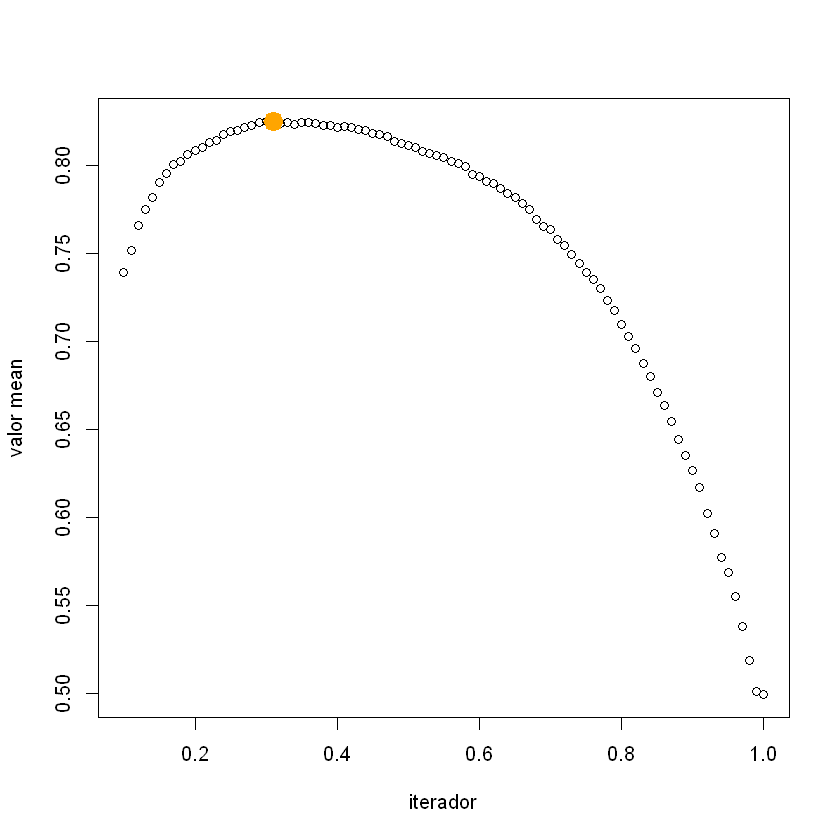

In [3]:
##########LOGISTIC######
  glm1<- glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = Train)
  summary(glm1)
  yhat2<- predict(glm1, Test,type="response")
  #para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
  #se repite 91 veces 
  size=1
  val_mean <- rep(0,91)
  for(i in seq(0.1,1,by=0.01)){
    y=as.integer(yhat2>i)
    y=ifelse(y =="0",0,1)
    val_mean[size]=mean(y == Test$FECHA_DEF)
    size=size+1
  }
  size=2
  lugar=1
  mejor=val_mean[lugar]
  for(i in seq(0.11,1,by=0.01)){
    if(val_mean[size]>mejor){
      mejor=val_mean[size]
      b=i
      lugar=size
    }
    size=size+1
  }
  y=seq(0.1,1,by=0.01)
  plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
  points(b, val_mean[lugar],  col = "orange", lwd = 10)
 ###valores elegidos
   b
  val_mean[lugar]

In [4]:
####ROCPLOT

  roc= as.numeric(Test$FECHA_DEF)
 
  roc.plot(x = roc, pred =yhat2,
           threshold = seq(0, max(yhat2), 0.05),
           plot.thres = c(0.03, 0.05, 0.1, 0.5, 0.9), main="Logistic")
  
 length(Test$FECHA_DEF)
 length(yhat2)

ERROR: Error in wilcox.test.default(pred[obs == 1], pred[obs == 0], alternative = "great"): not enough 'y' observations


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misl

[1] 0.8223654

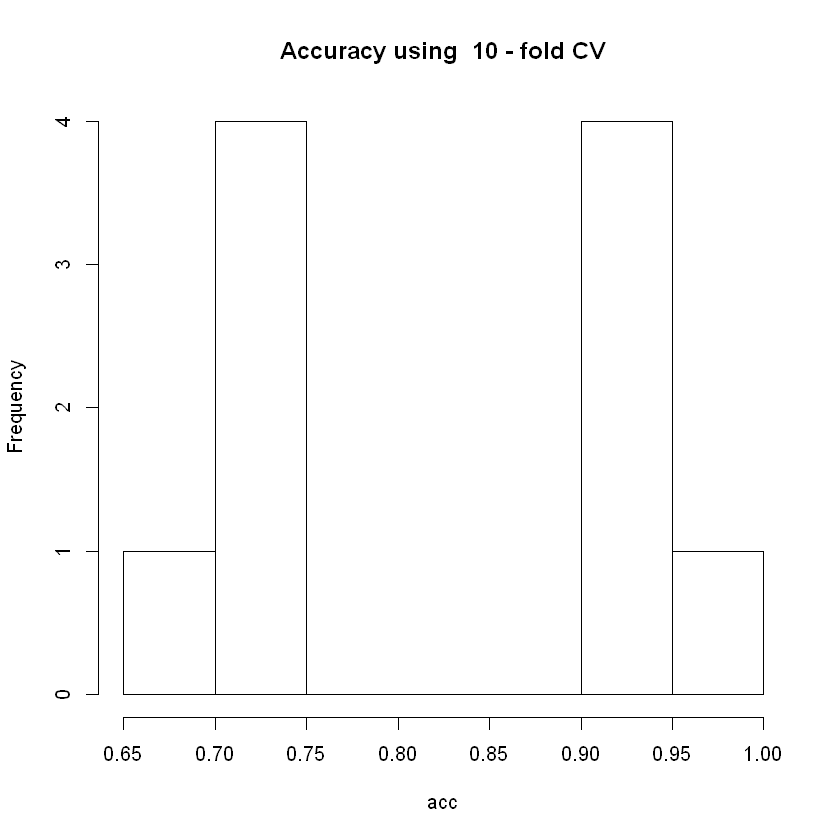

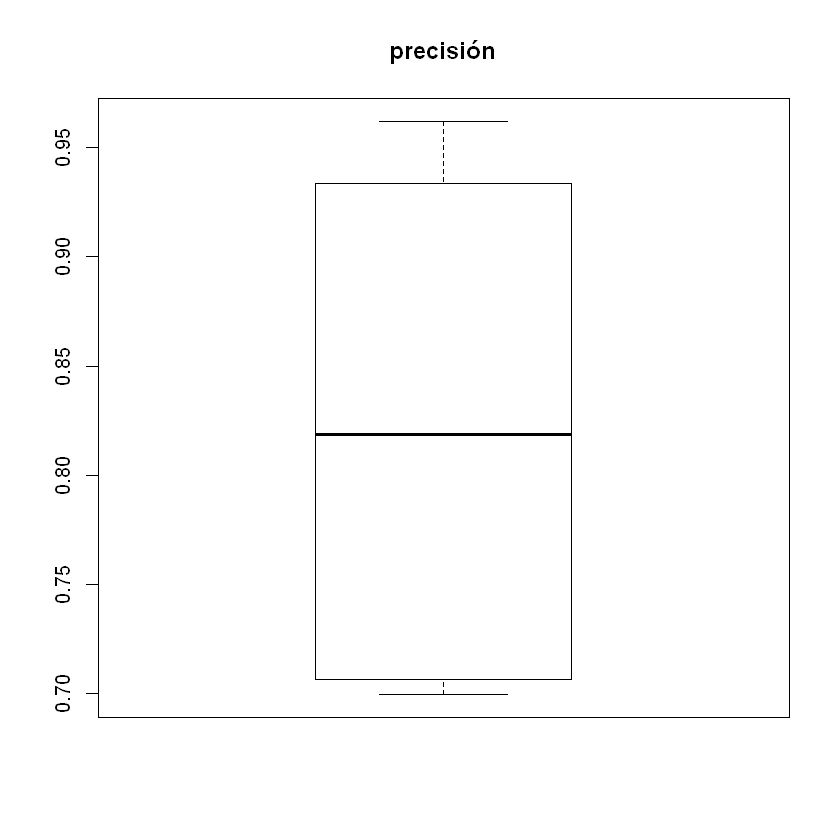

In [5]:
#################### k-folds
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <-glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,1,0) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")


Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"


[1] 0.8157852

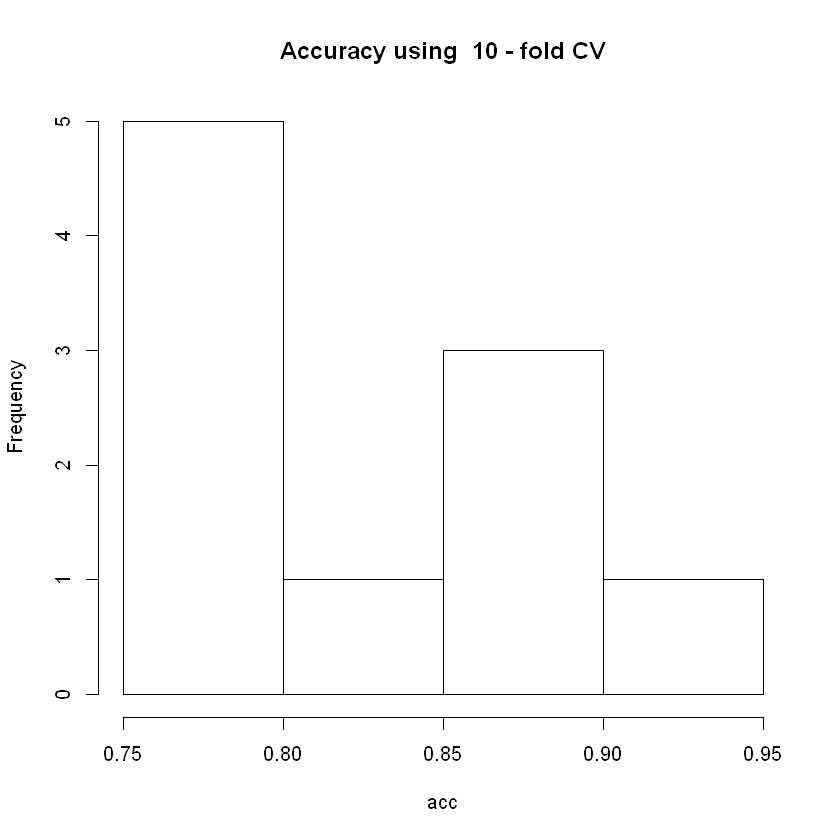

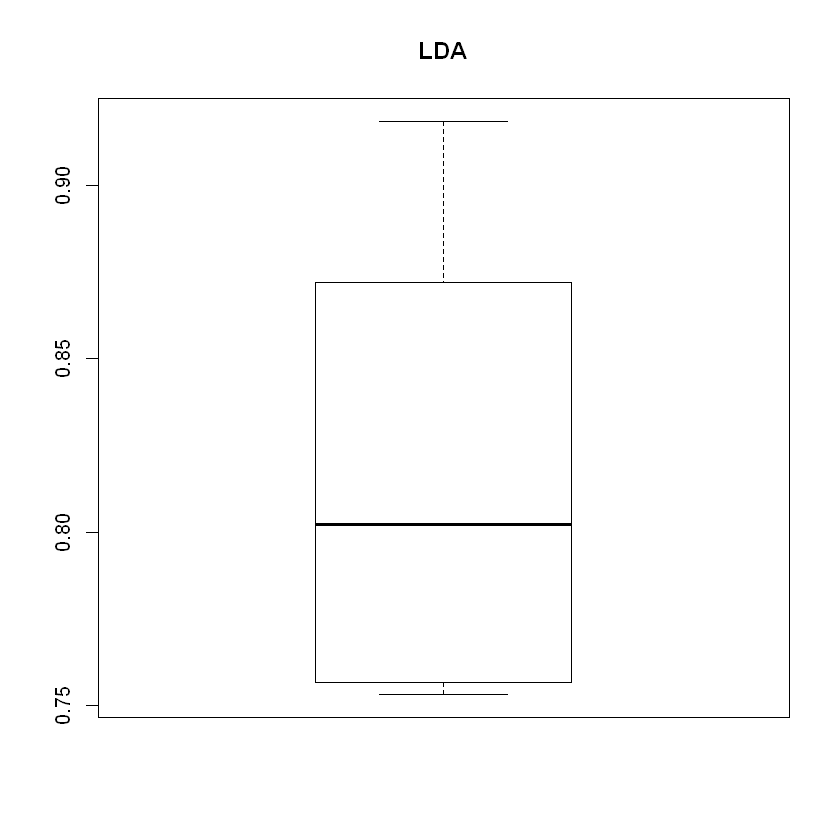

In [6]:
######kfolds
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")